# How will the bore propagate? 


The weir of channel of water depth $h_L$ (cm) and lineic flux discharge $q$ (cm$^2$.s$^{-1})$ is abruptly and completly closed, leading to a bore of velocity $W$ (cm.s$^{-1}$ extensing a steady water of depth $h_R$ (cm). 

We choose $x=h_R$ as the control space and $y=W$ as the observation space for a data assimilation experiment where $\sigma_b$ and $\sigma_r$ are the respective standard deviation of a background $x^b$ and an measuremet $y^o$. The observation operator is 
$$ {\cal G}(x) = {-q \over h_L - x} \quad \hbox{with} \quad G= {\cal G}'(x) = {q \over (h_L-x)^2}\;.$$ 




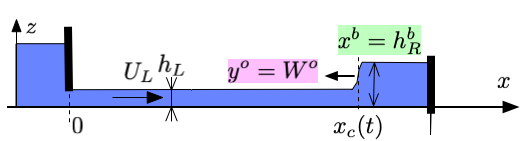







The analysis $x^a$ is the state that minimizes the cost function $J(x) = J_b(x) + J_r(x)$, which is approximated by the incremental cost function $J_{inc}(x)$. We define a true state $x^t$ with a true observation $y^t={\cal G}(x^t)$ and performed numerous twin experiments to estimate the score of the incremental methods 


This programs shows:
*   The cost function and its incremental approximation. 
*   A comparison between the true state and a average of analyses from multiple experiments. 
*   The averaged standard deviation of the analysis compared to the background standard deviation.


**References:**

*   O. Thual, "[Introduction to Data Assimilation for Scientists and Engineers](http://pedagotech.inp-toulouse.fr/130202/co/module_idase.html)", Open Learn. Res. Ed. INP 0202 (2013) 6h


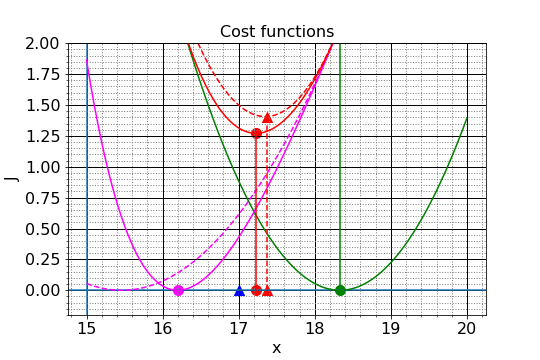

# Compilation of the subroutines

Execute first the code below to define the functions!

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
  
def inifig(xdim=7.5,ydim=5):
    # Standard figure initialization with grids
    plt.figure(figsize=(xdim,ydim))
    plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    plt.minorticks_on()
    plt.grid(which='minor',color='grey', axis='x', linestyle=':', linewidth=1)        
    plt.grid(which='minor',color='grey', axis='y', linestyle=':', linewidth=1)        
    #plt.axhline(0); plt.axvline(0)
    plt.xticks(fontsize=16); plt.yticks(fontsize=16)            

def cG_nol(x):
    # Observation operator
    y=-q/(x-hL)
    return y

def G_lin(x):
    # Linearized observation operator
    cGprime=q/(x-hL)**2
    return cGprime

    
def Jb_cost(x):
    # Background part of the cost function 
    return (x-xb)**2/(2*sigb**2)
 
def Jr_cost(x):
    # Observation part of the cost function 
    return (yo-cG_nol(x))**2/(2*sigr**2)

def J_cost(x):
    # Cost function
    return Jb_cost(x)+Jr_cost(x)

def Jrinc_cost(x):
    # Observation part of the incremental cost function 
    d=yo-cG_nol(xb); G=G_lin(xb)
    return (d-G*(x-xb))**2/(2*sigr**2)

def Jinc_cost(x):
    # Incremental cost function
    return Jb_cost(x)+Jrinc_cost(x)


# Sample experiments

The following parameters can be modified:  

*   `sigb`: The standard deviation of $x^b$
*   `sigr`: The standard deviation $y^o$
*   `show_cost`: =True to visualise the cost functions
*   `show_analysis`: =True to compute scores

In [ ]:
# Parameters to change
sigb=1; # Standard deviation of the background hR (cm)
sigr=10; # Standard deviation of the obseveration W (cm/s) 
ext=".png" # Figure format ".png" or ".pdf"
print('sigb=',sigb,'sigr=',sigr)

# Parameters for the plot of the cost functions
show_cost=True # Show the cost functions
Rcost=10 # Number of experiments for graphics
xmin, xmax=15, 20; # Min and Max of the plot for x
ymin, ymax=-.2, 2 # Min and Max of the plot for J

# Parameters for the plot the scores
show_analysis=True # Show the estimation of x^t and sigma_a
Rmax=1000 # Number of experiments the estimation

# Other parameters with no interest in changing
q=500 ; # Lineic discharge flux before experiment (cm^2/s))
hL= 10 # Water depth before experiment (cm)
xt=17;  # True state (cm)

# Derived parameters
yt=cG_nol(xt) # True observations

# Plotting the cost functions
if show_cost:
    x=np.linspace(xmin,xmax,100)
    for r in range(Rcost):
        # Background and Measurement
        xb=xt+np.random.normal(0,sigb)
        yo=yt+np.random.normal(0,sigr)
        inifig()
        plt.title("Cost functions",fontsize=16)
        plt.axvline(xmin); plt.axhline(0)  
        plt.xlabel("x",fontsize=16); plt.ylabel("J",fontsize=16)
        # True state
        plt.scatter(xt,0,marker='^',color='blue',s=100)
        # plotting Jb
        Jb=Jb_cost(x)
        plt.plot(x,Jb,color='green')
        plt.scatter(xb,0,marker='o',color='green',s=100)
        Jb=J_cost(xb)
        plt.scatter(xb,Jb,marker='s',color='green',s=100)
        plt.plot([xb,xb],[0,Jb],color='green')
        # plotting Jr
        Jr=Jr_cost(x)
        plt.plot(x,Jr,color='magenta')
        xo=hL-q/yo
        plt.scatter(xo,0,marker='o',color='magenta',s=100)
        # plotting Jrinc
        Jrinc=Jrinc_cost(x)
        Jrincb=Jrinc_cost(xb)
        plt.plot(x,Jrinc,color='magenta',linestyle='dashed')
        plt.scatter(xb,Jrincb,marker='s',color='magenta',s=100)
        # plotting J
        J=J_cost(x)
        ixa=np.argmin(J); xa=x[ixa]; Ja=J[ixa]
        plt.plot(x,J,color='red')
        plt.scatter(xa,Ja,marker='o',color='red',s=100)
        plt.scatter(xa,0,marker='o',color='red',s=100)
        plt.plot([xa,xa],[0,Ja],color='red')
        # plotting Jinc
        Jinc=Jinc_cost(x)
        ixainc=np.argmin(Jinc); xainc=x[ixainc]; 
        Jainc=Jinc_cost(xainc)
        plt.plot(x,Jinc,linestyle='dashed',color='red')
        plt.scatter(xainc,Jainc,marker='^',color='red',s=100)
        plt.scatter(xainc,0,marker='^',color='red',s=100)
        plt.plot([xainc,xainc],[0,Jainc],color='red',linestyle='dashed')
        # Bound and save
        plt.ylim(ymin,ymax) 
        print('======= Experiment number '+str(r)+' =======')
      
        plt.savefig('cost'+str(r)+ext)
        plt.show(); plt.close()
    

# Scores for the estimation of sigma_a
if show_analysis:
    Rtab=[]; scormean=[]; scorsig=[] 
    
    for R in np.arange(10,Rmax+1) :
        xb=xt+np.random.normal(0,sigb,R)
        yo=yt+np.random.normal(0,sigr,R)
        G=G_lin(xb)
        K=(G/sigr**2)/(1/sigb**2+G**2/sigr**2)
        d=yo-cG_nol(xb)
        xa=xb+K*d
        # Table of used R 
        Rtab=np.append(Rtab,R)
        # Analysis versus true state
        E=np.sum(xa)/R # Average of the true state
        smean=np.abs(E-xt)/xt;
        scormean=np.append(scormean,smean)
        # Variance reduction
        sigaR=(np.sum((xa-xt)**2)/R)**.5;
        ssig=(sigb-sigaR)/sigb;
        scorsig=np.append(scorsig,ssig)
    # Plot of the estimation of the true state
    inifig()
    plt.title('Estimation of $x^t$',fontsize=16)
    plt.axvline(0); plt.axhline(0)  
    plt.xlabel("$R$",fontsize=16); 
    plt.ylabel('$|x^a-x^t|/x^t$',fontsize=16)
    plt.plot(Rtab,scormean,color='green')
    plt.xscale("log"); plt.yscale("log")
    plt.savefig('scormean'+ext)
    
    # Plot of the estimation of sigma_a
    inifig()
    plt.title('Estimation of $\sigma_a$',fontsize=16)
    plt.axvline(0); plt.axhline(0)  
    plt.xlabel("$R$",fontsize=16); 
    plt.ylabel('$[\sigma_b-\sigma_a(R)]/\sigma_b$',fontsize=16)
    plt.plot(Rtab,scorsig,color='red')
    plt.xscale("log");
    plt.savefig('scorsig'+ext)
    
# Show all figures in command line model
print("Close all figures to stop the program")
plt.show()

# Estimation of the true state

We see that the averaged of the incremental analyses $\widetilde x^a$ for the large number $R$ of experiments still exhibit some bias. This is due to the use of the incremental cost function instead of the exact cost function.

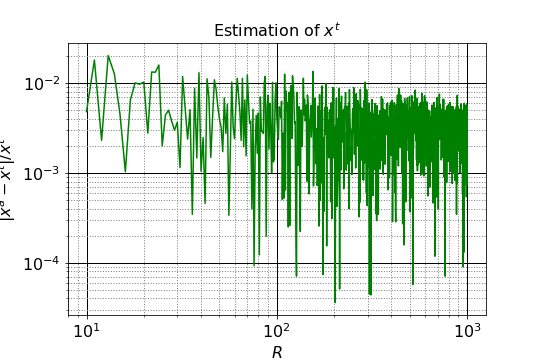

# Estimation of the analysis standard deviation

The standard deviation $\sigma_a$ of the analysis is smaller that the standard deviation $\sigma_b$ of the background. 



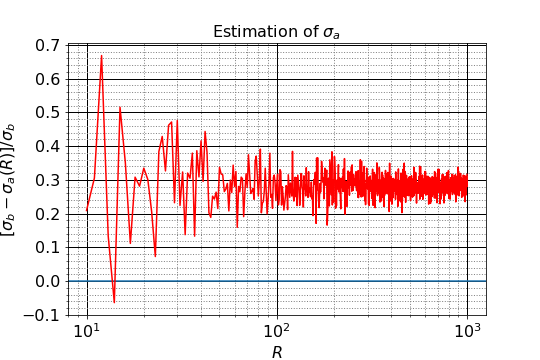